# Machine Learning Bullying a partir de Encuesta Mundial de Salud Escolar

### Grupo 9
Integrantes:
- Cruz, Ruth
- Gabis Leccesi, Luciana
- Gonzalez Navarro, Sol
- Palma, Malena Agustina
- Vidal, Teresa
- Stachoni, Yanina

**Dataset seleccionado:**
- Resultados encuesta EMSE
- Origen de datos: https://datos.gob.ar/ar/dataset/salud-base-datos-3deg-encuesta-mundial-salud-escolar-emse-con-resultados-nacionales-argentina

La Encuesta Mundial de Salud Escolar (EMSE) utiliza una metodología estandarizada a nivel mundial para relevar datos sobre aspectos sociodemográficos e indaga sobre conductas relacionadas con el comportamiento alimentario, el consumo de alcohol y otras drogas, la violencia y daños no intencionados, la seguridad vial, la salud mental, el cossumo de tabaco, la actividad física, los comportamientos sexuales y los factores de protección

**Objetivos:**
* La EMSE abarca muchas temáticas con más de 70 preguntas. Para nuestro estudio decidimos enforcarnos en temas de violencia y daños no intencionados, persiguiendo los siguientes objetivos:
  * Predecir victimas de intimidación escolar.


## Carga y análisis de datos

In [6]:
#Instalar librería para graficar métricas
!pip install sklearn-evaluation

In [7]:
# Importar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Funciones para separar y redistribuir datos
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Modelos seleccionados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metricas
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
)

from sklearn_evaluation import plot

# Balanceo de clases
from imblearn.over_sampling import SMOTE

# Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV

In [8]:
## Enlaces de google drive correspondientes a cada archivo del TP
url_EMSE_transformado= "https://docs.google.com/spreadsheets/d/1g_KPvX07bqnwMugDtc9bGR8_yLXx_2k5BwmyueXWuso/gviz/tq?tqx=out:csv&sheet=EMSE_DatosTransformados"

In [9]:
#Leer el csv con los datos ya procesados en la entrega anterior
df = pd.read_csv(url_EMSE_transformado)
#Mostrar algunos datos
df.sample(10)

,sexo,edad,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,padres_expectativas_altas_val,sexo_Femenino,sexo_Masculino,grado_val,tipo_lesion_val,causa_lesion_val,padres_fuman_val,padre_educacion_val,madre_educacion_val,amigos_alcohol_val
30128,Masculino,15.0,3er año/12vo grado nivel Polimodal o 5to año n...,1.56,68.0,Nunca,0,1,Sufrí un golpe u otra lesión en la cabeza o el...,Otra cosa causó mi lesión,...,2,False,True,2,5,6,1,3,1,3
34557,Femenino,14.0,1er año/10mo grado nivel Polimodal o 3er año n...,1.58,53.0,Nunca,1,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,2,True,False,0,1,5,3,6,6,3
21674,Masculino,16.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.70,64.0,Nunca,1,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,0,False,True,1,1,5,3,3,3,0
2503,Masculino,15.0,1er año/10mo grado nivel Polimodal o 3er año n...,1.63,50.0,Nunca,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,4,False,True,0,1,5,3,0,3,0
25351,Masculino,13.0,9no grado nivel Primario/Polimodal o 2do año n...,1.74,42.0,Rara vez,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,2,False,True,4,1,5,2,4,3,3
18399,Femenino,14.0,9no grado nivel Primario/Polimodal o 2do año n...,1.65,55.0,Nunca,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,2,True,False,4,1,5,3,6,5,3
6080,Femenino,15.0,1er año/10mo grado nivel Polimodal o 3er año n...,1.56,63.0,Rara vez,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,2,True,False,0,1,5,3,6,5,3
7275,Masculino,13.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.53,36.0,Nunca,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,0,False,True,1,1,5,3,0,0,0
2434,Masculino,16.0,3er año/12vo grado nivel Polimodal o 5to año n...,1.76,64.0,Nunca,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,4,False,True,2,1,5,0,3,3,3
14761,Femenino,16.0,3er año/12vo grado nivel Polimodal o 5to año n...,1.58,54.0,Rara vez,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,4,True,False,2,1,5,1,3,4,3


In [10]:
#Analizar nombres y tipos de columnas
columns = pd.DataFrame()
columns['columnas'] = df.columns
columns.set_index('columnas', inplace=True)
columns['tipo dato'] = df.dtypes
columns.sort_values('columnas')


,tipo dato
columnas,
altura,float64
amigos_alcohol,object
amigos_alcohol_val,int64
amigos_cercanos,int64
cantidad_lesiones,int64
causa_lesion,object
causa_lesion_val,int64
dias_act_fisica,int64
dias_clase_ef,int64


> Se verifica que se pueden eliminar todas las columnas de tipo "object" (categoricas) porque ya tienen su respectiva columna numérica

In [11]:
#Seleccionar todas las columnas de tipo "object"
columnas_categoricas = df.select_dtypes(object).columns
columnas_categoricas

Index(['sexo', 'grado', 'hambre', 'tipo_lesion', 'causa_lesion',
       'sentir_soledad', 'sentir_preocupacion', 'padres_fuman',
       'otros_amables', 'padres_tarea', 'padres_atencion',
       'padres_tiempo_libre', 'padres_revisar', 'padre_educacion',
       'madre_educacion', 'amigos_alcohol', 'sentir_ridiculo',
       'padres_expectativas_altas'],
      dtype='object')

In [12]:
# Eliminar columnas categoricas
df.drop(columns=columnas_categoricas, inplace=True)
# Ver tipo y nulos en columnas remanentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34878 entries, 0 to 34877
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   edad                           34878 non-null  float64
 1   altura                         34878 non-null  float64
 2   peso                           34878 non-null  float64
 3   participar_pelea               34878 non-null  int64  
 4   cantidad_lesiones              34878 non-null  int64  
 5   pensar_suicidio                34878 non-null  int64  
 6   intentar_suicidio              34878 non-null  int64  
 7   amigos_cercanos                34878 non-null  int64  
 8   edad_cigarrillo                34878 non-null  int64  
 9   dias_fumar                     34878 non-null  int64  
 10  edad_alcohol                   34878 non-null  int64  
 11  dias_tomar_alcohol             34878 non-null  int64  
 12  problemas_alcohol              34878 non-null 

> Se verifica que solo hay columnas numéricas y sin datos nulos.

> El dataset tiene 41 columnas y 34878 filas

## Selección del algoritmo

### Análisis
#### Objetivo
Nuestro objetivo es lograr predecir si algún niño o niña será víctima de intimidación escolar.

Por ello:
- Nuestra variable dependiente es **intimidacion_escuela**, que solo toma dos valores "Si" y "No".
- El tipo de aprendizaje es **supervisado** ya que contamos con **datos etiquetados** (víctima / no víctima)
- Nuestro problema es de **clasificación binaria** ya que tenemos dos posibles clases:
    - **Víctima** de intimidación escolar.
    - **No víctima** de intimidación escolar.


In [13]:
#Verificar valores que toma la variable dependiente
df["intimidacion_escuela"].unique()

array([0, 1])

### Seleccion de variales y división de datos

In [14]:
#Variables independientes
X = df.drop(['intimidacion_escuela'], axis=1)

Decidimos sacar las 3 porque podría llevar a conclusiones equivocadas.

In [15]:
#Variable dependiente
y = df['intimidacion_escuela']

In [16]:
#Dividir los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Modelos

### Modelo KNN

In [17]:
# Instancia del modelo KNN
knn = KNeighborsClassifier()

In [18]:
# Entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Predicciones sobre datos de testeo
y_pred_knn = knn.predict(X_test)

#### Evaluación de Calidad

##### ***Métricas***


In [20]:
# Nombrar las etiquetas para informes y gráficos
etiquetas = ['No Víctima', 'Víctima']

Evaluación del modelo KNN



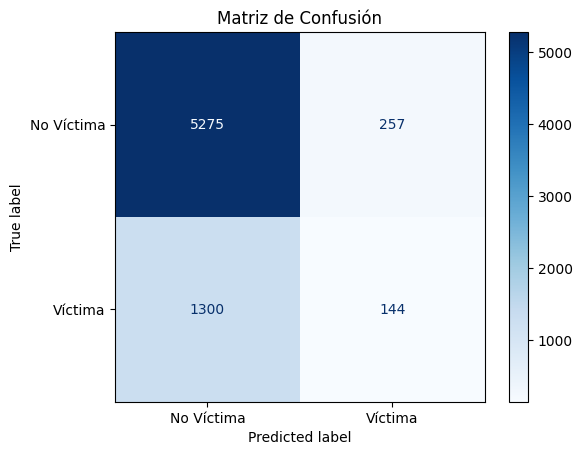

Reporte de clasificación:
               precision    recall  f1-score   support

  No Víctima       0.80      0.95      0.87      5532
     Víctima       0.36      0.10      0.16      1444

    accuracy                           0.78      6976
   macro avg       0.58      0.53      0.51      6976
weighted avg       0.71      0.78      0.72      6976


Accurancy o Exactitud: 0.7768061926605505


In [21]:
# Evaluación del modelo KNN
print("Evaluación del modelo KNN\n")
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,  display_labels = etiquetas)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

print("Reporte de clasificación:\n", classification_report(y_test, y_pred_knn, target_names=etiquetas))
print("\nAccurancy o Exactitud:", accuracy_score(y_test, y_pred_knn))


**Matriz de confusión**:
- Verdaderos negativos (VN): 5275 predicciones correctas de "No víctima"
- Falsos positivos (FP): 257 predicciones incorrectas de "Víctima" cuando en realidad era "No víctima"
- Falsos negativos (FN): 1300 predicciones incorrectas de "No víctima" cuando en realidad era "Víctima"
- Verdaderos positivos (VP): 144 predicciones correctas de "Víctima"

**Precision (Precisión)**:
La precisión es la proporción de verdaderos positivos sobre el total de elementos clasificados como positivos (Verdaderos y Falsos Positivos). En este caso:
- Clase "No víctima": 0.80 (80%)
- Clase "Víctima": 0.36 (36%)

Esto significa que cuando el modelo predice "No víctima", tiene un 80% de probabilidad de ser correcto, mientras que para "Víctima", solo un 36% de las predicciones son correctas.

**Recall (Exhaustividad o Sensibilidad)**:
El recall mide la proporción de verdaderos positivos sobre el total de elementos que realmente son positivos (verdaderos positivos y falsos negativos). En este caso:
- Clase "No víctima": 0.95  (95%)
- Clase "Víctima": 0.10 (10%)

Nuevamente esto indica que el modelo es muy bueno para identificar los casos de "No víctima", detectando el 95% de ellos, pero tiene un rendimiento muy bajo para la clase "Víctima", donde solo identifica el 10%.

**F1-score**:
El F1-score es la media armónica entre la precisión y el recall. Es útil para tener un balance entre ambas métricas. En este caso
- Clase "No víctima": 0.87
- Clase "Víctima": 0.16

También esta métrica indica que para la clase "No víctima" el F1-score es bastante bueno, pero para la clase "Víctima" es bajo, es decir que el modelo no está funcionando bien para esta clase.

**Support (Soporte)**:
El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos:
- Clase "No víctima": 5532
- Clase "Víctima": 1444

Esto muestra que hay más ejemplos de "No víctima" en el conjunto de datos, lo que puede influir en las métricas de rendimiento. 79,3% de los datos de pruebas era de casos de "No víctima".

**Promedios (Macro y Weighted)**:
Unifica las métricas para todas las clases, dando un valor general al modelo.

- **Macro Avg**: Promedio simple de las métricas de cada clase. No considera el soporte, por lo que cada clase tiene el mismo peso.
 - Precision: 0.58
 - Recall: 0.53
 - F1-Score: 0.51

- **Weighted Avg**: Promedio ponderado que considera el soporte de cada clase, lo que significa que las clases con más ejemplos tienen un mayor impacto en las métricas.
 - Precision: 0.71
 - Recall: 0.78
 - F1-Score: 0.72

**Precisión general (accuracy score)**: 0.77 o 77,68%. El modelo predice correctamente el 77,68% de las veces.

##### ***Análisis de métricas***




1. Hay **desbalance de clases**: el modelo estaría sesgado hacia la clase "No Víctima" ya que tiene un **recall** alto para esta clase (0.95) pero muy bajo para la clase "Víctima" (0.10). Esto podría indicar que el modelo está sobreajustado a la clase mayoritaria ("No Víctima"), y no está prediciendo bien la clase minoritaria ("Víctima). Así mismo, el **soporte (support)** evidencia que hay una gran diferencia de cantidad de datos entre las clases, siendo 5532 para la mayoritaria y solo 1444 para la minoritaria.

2. La **precisión** sobre la clase "Víctima" es muy baja (0.36) Lo que indica que casi aproximadamente dos tercios de las predicciones de "Víctima" son incorrectas.

3. El número de **Falsos Negativos** es llamativamente alto: 1300 predicciones, 18,63% del total de muestras. Esto quiere decir que el modelo está prediciendo demasiada veces como "no víctima" cuando en realidad es "víctima".

4. El **F1-score** bajo para la clase "Víctima" (1), de sólo 0.16 evidencia las dificultades del modelo para predecir los casos de "Víctima".


### Modelo Random Forest

In [22]:
# Crear y entrenar el modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predecir con el modelo Random Forest
y_pred_rf = rf.predict(X_test)

####Evaluación de Calidad

##### ***Métricas***

Evaluación del modelo Random Forest



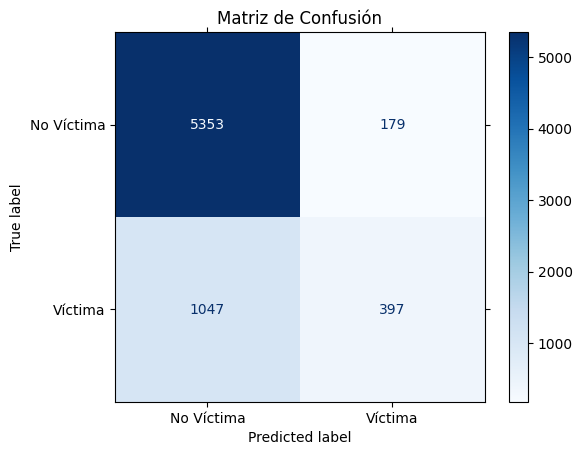

Reporte de clasificación:
               precision    recall  f1-score   support

  No Víctima       0.84      0.97      0.90      5532
     Víctima       0.69      0.27      0.39      1444

    accuracy                           0.82      6976
   macro avg       0.76      0.62      0.65      6976
weighted avg       0.81      0.82      0.79      6976


Accurancy o Exactitud: 0.8242545871559633


In [51]:
# Evaluación del modelo Random Forest
print("Evaluación del modelo Random Forest\n")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,  display_labels = etiquetas)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf, target_names=etiquetas))
print("\nAccurancy o Exactitud:", accuracy_score(y_test, y_pred_rf))


**Matriz de confusión**:
- Verdaderos negativos (VN): 5353 predicciones correctas de "No víctima"
- Falsos positivos (FP): 179 predicciones incorrectas de "Víctima" cuando en realidad era "No víctima"
- Falsos negativos (FN): 1047 predicciones incorrectas de "No víctima" cuando en realidad era "Víctima"
- Verdaderos positivos (VP): 397 predicciones correctas de "Víctima"

**Precision (Precisión)**:
La precisión es la proporción de verdaderos positivos sobre el total de elementos clasificados como positivos (Verdaderos y Falsos Positivos). En este caso:
- Clase "No víctima": 0.84 (84%)
- Clase "Víctima": 0.69 (69%)

Esto significa que cuando el modelo predice "No víctima", tiene un 84% de probabilidad de ser correcto, mientras que para "Víctima" un 69% de las predicciones son correctas.

**Recall (Exhaustividad o Sensibilidad)**:
El recall mide la proporción de verdaderos positivos sobre el total de elementos que realmente son positivos (verdaderos positivos y falsos negativos). En este caso:
- Clase "No víctima": 0.97  (97%)
- Clase "Víctima": 0.27 (27%)

Esto indica que el modelo es muy bueno para identificar los casos de "No víctima", detectando el 97% de ellos, pero tiene un rendimiento muy bajo para la clase "Víctima", donde solo identifica el 27%.

**F1-score**:
El F1-score es la media armónica entre la precisión y el recall. Es útil para tener un balance entre ambas métricas. En este caso
- Clase "No víctima": 0.90
- Clase "Víctima": 0.39

También esta métrica indica que para la clase "No víctima" el F1-score es bastante bueno, pero para la clase "Víctima" es bajo, es decir que el modelo no está funcionando bien para esta clase.

**Support (Soporte)**:
El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos:
- Clase "No víctima": 5532
- Clase "Víctima": 1444

Esto muestra que hay más ejemplos de "No víctima" en el conjunto de datos, lo que puede influir en las métricas de rendimiento. 79,3% de los datos de pruebas era de casos de "No víctima".

**Promedios (Macro y Weighted)**:
Unifica las métricas para todas las clases, dando un valor general al modelo.

- **Macro Avg**: Promedio simple de las métricas de cada clase. No considera el soporte, por lo que cada clase tiene el mismo peso.
 - Precision: 0.76
 - Recall: 0.62
 - F1-Score: 0.65

- **Weighted Avg**: Promedio ponderado que considera el soporte de cada clase, lo que significa que las clases con más ejemplos tienen un mayor impacto en las métricas.
 - Precision: 0.81
 - Recall: 0.82
 - F1-Score: 0.79

**Precisión general (accuracy score)**: 0.82 o 82,42%. El modelo predice correctamente el 82,42% de las veces.

##### ***Análisis de métricas***


El modelo tiene un buen desempeño general  con una **exactitud (accuracy)** del 82%. Sin embargo podemos resaltar algunos puntos

1. **Desbalance de clases**: Al igual que en el modelo anterior, este modelo también muestra un sesgo hacia la clase "No Víctima" con un **recall** muy alto para esta clase (0.97) y muy bajo para la clase "Vícitma" o Clase 1 (0.27). Esto indica que el modelo está sobreajustado a la clase mayoritaria (recurrencia). El conjunto de datos de pruebas es igual para ambos modelos, por lo tanto el **soporte (support)** es el mismo, 5532 para la mayoritaria y solo 1444 para la minoritaria.

2. La **Precisión** mejora considerablemente a valores más aceptables para la clase "Víctima" (0,69), aunque aún así el 30% de las predicciones como "Víctima" son incorrectas.

3. El modelo tiene dificultades para identificar correctamente los casos de la clase "Víctima", lo que se refleja en el bajo puntaje **F1-score** de 0.39 para esa clase.

4. Los casos de **Falsos Positivos** siguen siendo llamativamente altos.

## Conclusiones

Comparemos la curva ROC-AUC de cada modelo.

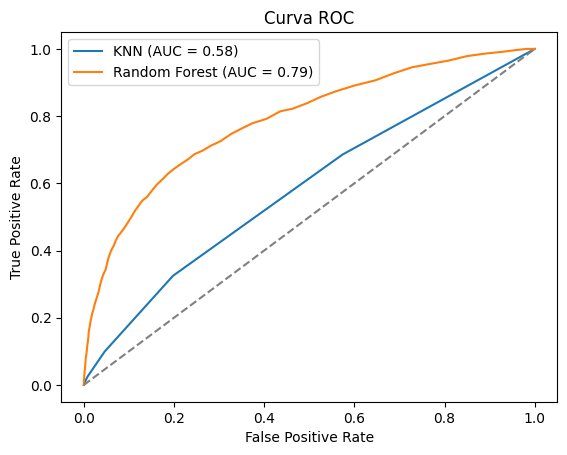

In [25]:
# Probabilidades para la curva ROC
y_prob_knn = knn.predict_proba(X_test)
y_prob_rf = rf.predict_proba(X_test)

# Curvas ROC y AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn[:, 1] )
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf[:, 1] )

auc_knn = roc_auc_score(y_test, y_prob_knn[:, 1] )
auc_rf = roc_auc_score(y_test, y_prob_rf[:, 1] )

# Graficar las curvas ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

El modelo Random Forest es claramente superior, considerando las siguientes franjas:

- 0.5 < AUC < 0.7: El modelo tiene una discriminación aceptable pero pobre.
- 0.7 ≤ AUC < 0.8: El modelo tiene una discriminación aceptable.

Podemos observar que Random Forest tiene una discriminación aceptable, mientras que KNN, una discriminación pobre.



Modelo KNN


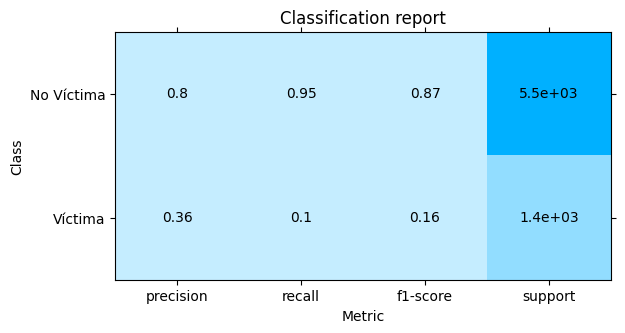

In [26]:
#Reporte de clasificación de los dos modelos
print("Modelo KNN")
cr_knn = plot.ClassificationReport.from_raw_data(
    y_test, y_pred_knn, target_names=etiquetas)


Modelo Random Forest


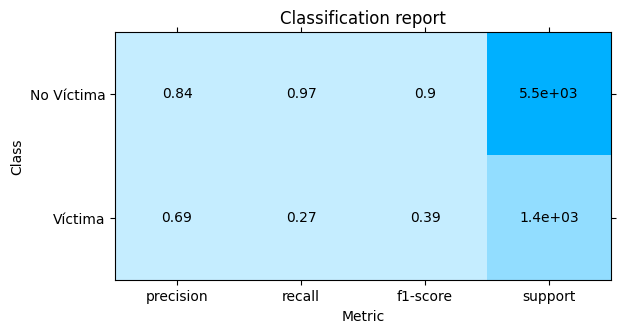

In [27]:
print("Modelo Random Forest")
cr_rf = plot.ClassificationReport.from_raw_data(
    y_test, y_pred_rf, target_names=etiquetas)


Comparación de Modelos KNN/Random Forest


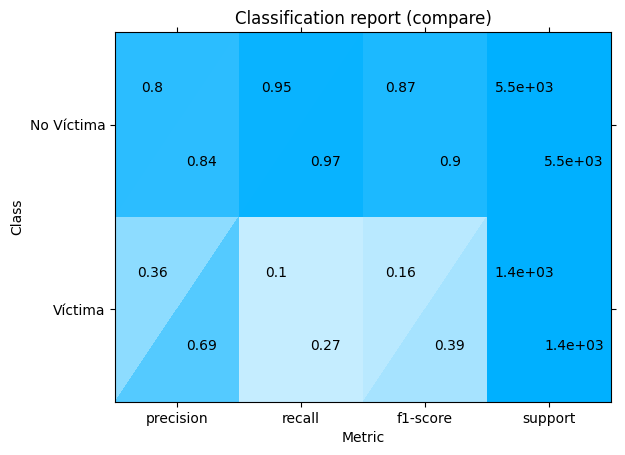

In [28]:
# Comparar Reporte de Clasificación de los modelos
print("Comparación de Modelos KNN/Random Forest")
cr_knn + cr_rf

En todas las métricas el modelo Random Forest es superior a KNN. Sin embargo se destaca el bajo rendimiento de ambos para la clase "Víctima"

Random Forest tiene una exactitud del 83,42% y sus métricas promedio (macro y weighted) son parejas y "aceptabes" con 0.76 de recall y 0.65 de precisión. Como primer modelo, podríamos decir que tiene un buen desempeño. Sin embargo no tiene un buen recall para predecir la clase "Víctima" (0.27), que en el caso de nuestro objetivo tiene mucho peso en decisiones y medidas que se podrían tomar.

El modelo KNN, en contraparte, tiene una exactitud del 77,68%, métricas muy bajas para la clase "Víctima" tanto en recall como en precisión y, en consecuencia, también el F1-score. Si miramos el promedio entre las clases tampoco es bueno, siendo 0.5 tanto recall como precisión.

Creemos que ambos modelos pueden mejorar ajustando el balance entre las clases y probando con diversos hiperparámetros.

## Mejora de Modelos

Como primera medida, podemos ver un desbalance de clases que puede llevar a que ambos modelos no se comporten correctamente. Aunque parece afectar más a KNN, ambos tienen dificultades para predecir correctamente las víctimas de bullying.

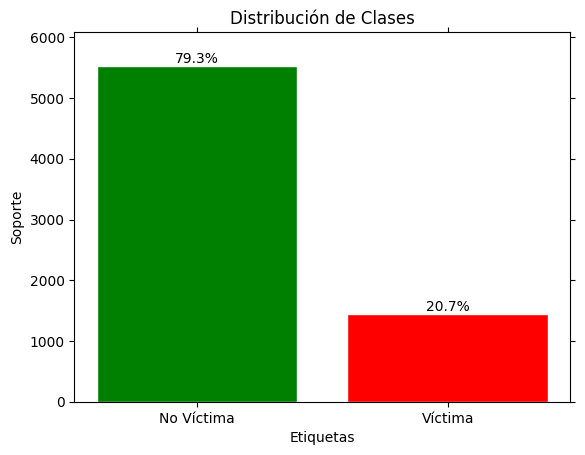

In [29]:
# Datos de soporte
soporte = [5532, 1444]
total = sum(soporte)

# Crear gráfico de barras
fig, ax = plt.subplots()
ax.bar(etiquetas, soporte, color=['green', 'red'])
plt.xlabel('Etiquetas')
plt.ylabel('Soporte') # support
plt.title('Distribución de Clases')
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{(x/total)*100:0.1f}%')
    ax.margins(y=0.1)
plt.show()

También podemos mencionar que no hemos ajustado ninguno de los hiperparámetros de cada modelo, por lo que encontraremos los mejores de cada uno para volver a probarlos con las clases balanceadas.

### Balanceo de clases

In [30]:
# Balanceo de clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Separar los datos balanceados en conjuntos de entrenamiento y prueba
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


### Ajuste de Hiperparámetros

#### KNN

In [31]:
# Hiperparámetros para KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }

Hemos seleccionado los siguientes hiperparámetros con sus respectivos valores:

1. **n_neighbors**: Define cuántos vecinos más cercanos se considerarán al hacer una predicción para un nuevo punto de datos. Es uno de los parámetros más importantes en el algoritmo KNN. Hemos elegido los valores 3, 5, 7 y 9.

2. **weights**: Determina cómo se ponderan los vecinos en la predicción. Hemos elegido estas opciones:
- '*uniform'*: Todos los vecinos tienen el mismo peso en la decisión de clasificación. Cada vecino contribuye igualmente a la predicción.
- *'distance'*: Los vecinos más cercanos tienen más peso que los más lejanos. Esto significa que las predicciones se basan más en los vecinos que están más cerca del punto de consulta.

3. **metric**: Especifica la métrica de distancia que se utilizará para calcular la distancia entre los puntos de datos. Hemos incluido:
- *'euclidean'*: La distancia euclidiana es la distancia "normal" en un espacio cartesiano.
- *'manhattan'*: La distancia de Manhattan (o distancia de L1) se calcula como la suma de las diferencias absolutas entre las coordenadas.

In [32]:
# Búsqueda de hiperparámetros para KNN con clases balanceadas
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_resampled, y_train_resampled)
best_knn = knn_grid.best_estimator_

best_knn


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [42]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

La mejor combinación de hiperparámetros obtenida es:
- n_neighbors: 3
- weights: distance
- metric: manhattan

In [33]:
# Predicción de KNN con los mejores hiperparámetros
y_best_pred_knn = knn_grid.predict(X_test_resampled)

##### Evaluación del modelo

Evaluación del modelo KNN



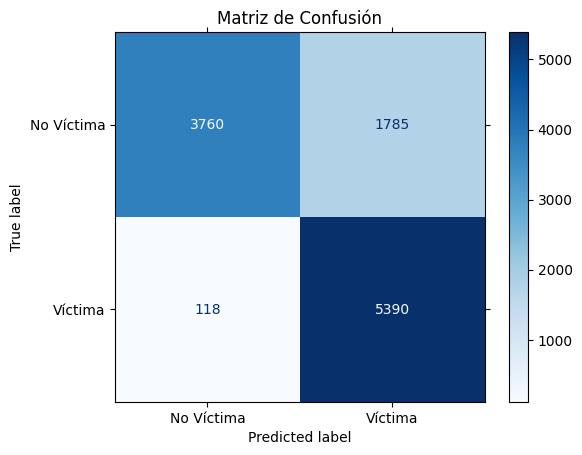


Accurancy o Exactitud: 0.8278295485388583

Reporte de clasificación:
Reporte de clasificación:
               precision    recall  f1-score   support

  No Víctima       0.97      0.68      0.80      5545
     Víctima       0.75      0.98      0.85      5508

    accuracy                           0.83     11053
   macro avg       0.86      0.83      0.82     11053
weighted avg       0.86      0.83      0.82     11053



In [68]:
print("Evaluación del modelo KNN\n")
cm_knn = confusion_matrix(y_test_resampled, y_best_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,  display_labels = etiquetas)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

print("\nAccurancy o Exactitud:", accuracy_score(y_test_resampled, y_best_pred_knn))
print("\nReporte de clasificación:")
print("Reporte de clasificación:\n", classification_report(y_test_resampled, y_best_pred_knn, target_names=etiquetas))



##### Comparación de métricas




Podemos observar que la **exactitud (accuracy)** con estos ajustes aportó una mejora significativa desde un 77,68% a un 82,78%.

Las métricas **promedio(macro y weighted)** se ubican en torno al 0.8, lo que significa que el modelo tiene un buen rendimiento en general.

Los **Falsos Positivos** disminuyeron drásticamente del 18,6% a sólo el 1% del total de los datos de muestra.

Las métricas para la clase "Víctima" para la que el modelo anterior era muy deficiente, mejoraron a niveles muy aceptables, con un **recall** de 0.98, solo 2 de cada 100 predicciones de "Víctima" no lo son. Y una **precisión** del 0.75, para cada prediccón de"Víctima" hay un 75% de probalidad de acierto.

El **soporte** nos muestra el balanceo de clases. En esta ocasión hay 5545 casos de "No Víctima" y 5508 casos de "Víctima"


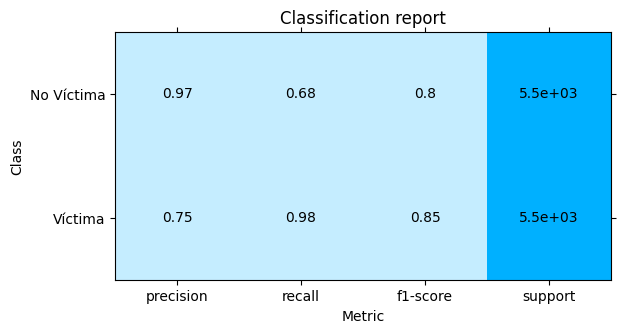

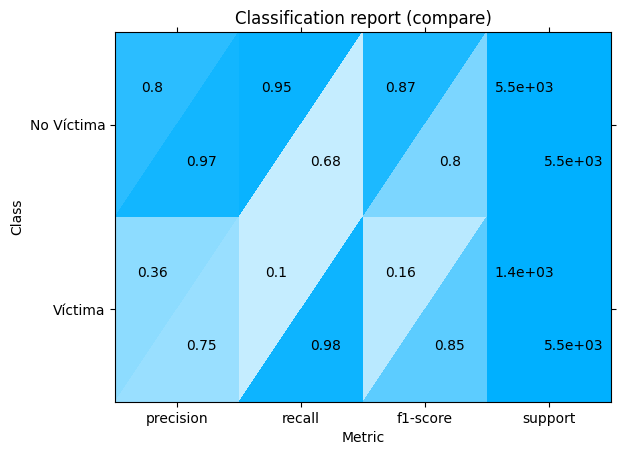

In [69]:
cr_best_knn = plot.ClassificationReport.from_raw_data(
    y_test_resampled, y_best_pred_knn, target_names=etiquetas)
cr_knn + cr_best_knn

Podemos observar que para la clase "Víctima" todas las métricas mejoraron considerablemente.

Para la clase "No Víctima" si bien el recall disminuye, la precisión aumenta y el F1-score se mantiene en 0.8, por lo que es un comportamiento aceptable.

#### Random Forest

In [44]:
# Hiperparámetros para Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


Hemos seleccionado los siguientes hiperparámetros con sus respectivos valores:

1. **n_estimators**: Indica el número de árboles en el bosque. Hemos elegido el valor por defecto, 100, la mitad y el doble.

2. **max_depth**: Limita la profundidad máxima de cada árbol. Un árbol más profundo puede modelar relaciones más complejas, pero también puede llevar al sobreajuste. Los valores elegidos son None (sin límite de profundidad) y profundidades específicas de 10, 20 y 30.

3. **min_samples_split**: Especifica el número mínimo de muestras requeridas para dividir un nodo. Un valor más alto puede prevenir el sobreajuste al hacer que los árboles sean más generales. Los valores elegidos son 2 (por defecto), 5 y 10.

4. **min_samples_leaf**: Número mínimo de muestras que debe tener un nodo hoja. Un valor mayor puede ayudar a suavizar el modelo, reduciendo el sobreajuste. Los valores en el diccionario son 1 (por defecto), 2 y 4.


In [45]:
# Búsqueda de hiperparámetros para Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_resampled, y_train_resampled)
rf_grid.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=200)

In [49]:
rf_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

La mejor combinación de hiperparámetros obtenida es:
- n_estimators: 200
- max_depth: 30
- min_samples_leaf: 1
- min_samples_split: 2

In [47]:
# Predicción de Random Forest con los mejores hiperparámetros
y_best_pred_rf = rf_grid.predict(X_test_resampled)

##### Evaluación del modelo

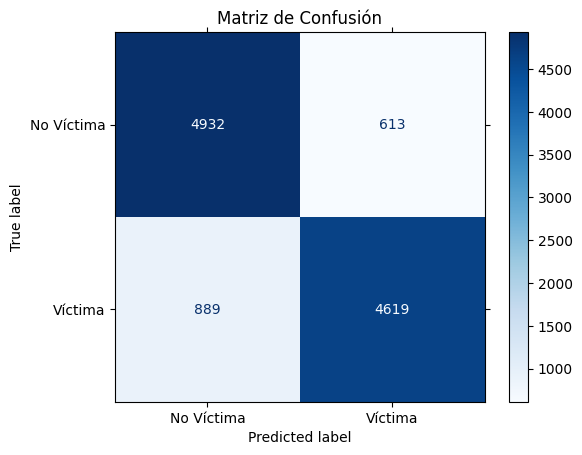


Accurancy o Exactitud: 0.864109291595042
Reporte de clasificación:
               precision    recall  f1-score   support

  No Víctima       0.85      0.89      0.87      5545
     Víctima       0.88      0.84      0.86      5508

    accuracy                           0.86     11053
   macro avg       0.87      0.86      0.86     11053
weighted avg       0.86      0.86      0.86     11053



In [67]:
# Evaluación del modelo Random Forest
cm_rf = confusion_matrix(y_test_resampled, y_best_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,  display_labels = etiquetas)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

print("\nAccurancy o Exactitud:", accuracy_score(y_test_resampled, y_best_pred_rf))

print("Reporte de clasificación:\n", classification_report(y_test_resampled, y_best_pred_rf, target_names=etiquetas))

##### Comparación de métricas


Podemos observar que la **exactitud (accuracy)** con estos ajustes aportó una leve mejora 82,42% a un 86,41%.

Las métricas **promedio(macro y weighted)** se ubican en torno al 0.86, lo que significa que el modelo tiene un buen rendimiento en general.

Los **Falsos Positivos** disminuyeron del 15% sobre el total de datos a 8%.

Las métricas para la clase "Víctima" para la que el modelo anterior era muy deficiente, mejoraron a niveles muy aceptables, con un **recall** de 0.84, solo 16% de la predicciones de "Víctima" no lo son. Y una **precisión** del 0.88, para cada prediccón de"Víctima" hay un 88% de probalidad de acierto.

El **soporte** nos muestra el balanceo de clases. En esta ocasión hay 5545 casos de "No Víctima" y 5508 casos de "Víctima"


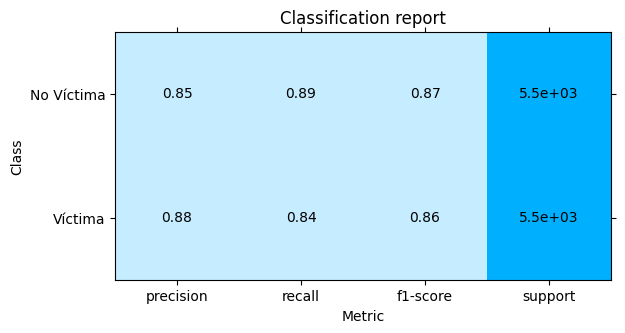

In [65]:
cr_best_rf = plot.ClassificationReport.from_raw_data(
    y_test_resampled, y_best_pred_rf, target_names=etiquetas)


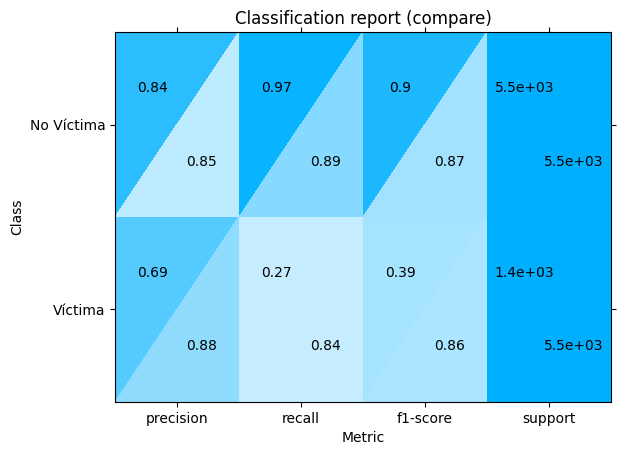

In [66]:
cr_rf + cr_best_rf

Podemos observar que para la clase "Víctima" todas las métricas mejoran y para la clase "No Víctima", si bien disminuye la precisión y el f1-score, es una diferencia mínima y se mantiene sobre 0.85 en todas. Por lo que el modelo en general mejora y tiene muy buenas métricas para las dos clases.

## Conclusiones Finales

In [71]:
# Probabilidades para la curva ROC
y_prob_knn_best = knn_grid.predict_proba(X_test_resampled)[:, 1]
y_prob_rf_best  = rf_grid.predict_proba(X_test_resampled)[:, 1]

# Curvas ROC y AUC
fpr_knn_best, tpr_knn_best, _ = roc_curve(y_test_resampled, y_prob_knn_best )
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test_resampled, y_prob_rf_best )

auc_knn_best = roc_auc_score(y_test_resampled, y_prob_knn_best)
auc_rf_best = roc_auc_score(y_test_resampled, y_prob_rf_best)



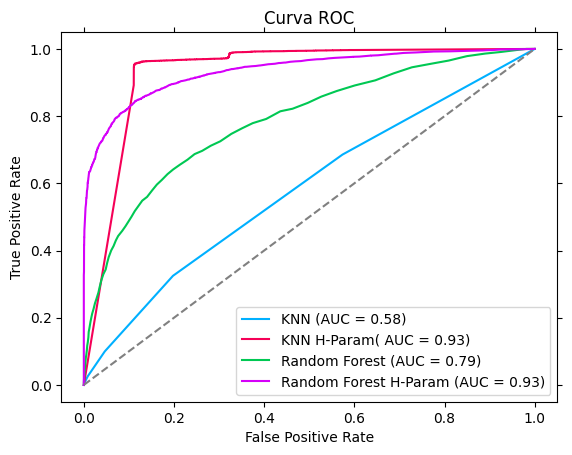

In [73]:
# Graficar las curvas ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_knn_best, tpr_knn_best, label=f'KNN H-Param( AUC = {auc_knn_best:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_rf_best, tpr_rf_best, label=f'Random Forest H-Param (AUC = {auc_rf_best:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

Podemos observar que luego de ajustar los dos modelos con sus hiperparámetros y con cargas balanceadas, ambos mejoran notablemente.

Si comparamos ambos vemos que:

- Los dos comparten el mismo AUC de 0.93, es decir tienen una excelente discriminación.

- **KNN**
  - Tiene mejor curva ROC.
  - Tiene una alta precisión para la clase "No Víctima" (0.97), pero una precisión más baja para "Víctima" (0.75).
  - Tiene un recall muy alto para "Víctima" (0.98), lo que significa que identifica correctamente casi todas las instancias de esta clase, pero tiene un recall más bajo para "No Víctima" (0.68).
  - Hay un alto número de falsos negativos (1785) para "No Víctima", lo que sugiere que el modelo está clasificando incorrectamente muchas instancias de esta clase.

- **Random Forest**
  - Tiene una exactitud o accuracy más alta (0.86).
  - Tiene tanto una precisión como un recall equilibrado entre las clases. Para todos los casos supera el 0.8.
  - Aunque también hay bastantes falsos negativos (889), la cantidad es significativamente menor que en KNN, lo que indica un mejor rendimiento general.
  - Aunque tiene más falsos positivos está más balanceado respecto de falsos negativos.

### **Elección Final**

Dado que **Random Forest** tiene un mejor equilibrio en las métricas de rendimiento y una mayor precisión general, recomendamos elegir este modelo.